## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
# Generate 50 points equally distributed between 0 and 20
X_org = np.linspace(0, 20, 50).reshape(50,1)

y = -1*X_org + 2
m = X_org.shape[0]

X = (X_org-np.mean(X_org)) / np.std(X_org) ##########################################

X = np.block([np.ones((m, 1)), X])

#### Plot your data points. 

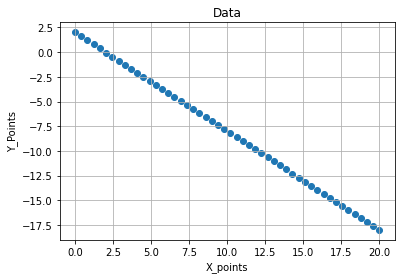

In [3]:
plt.scatter(X_org,y)
plt.xlabel("X_points")
plt.ylabel("Y_Points")
_ = plt.title("Data")
plt.grid()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

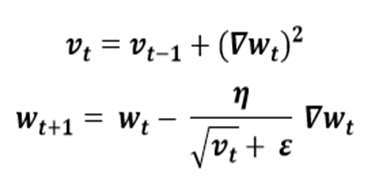

In [4]:
def compute_cost(X, y, theta):
    diff = (X @ theta) - y
    return (diff.T @ diff)/(2*m)

In [5]:
def create_mini_batches(X, y, batch_size, shuff):
    m = X.shape[0]
    n_minibatches = m // batch_size
    mini_batches = []

#     print(n_minibatches)
#     print(m)
    if shuff:
        X, y = shuffle(X,y)
    t=0
    for t in range(0, n_minibatches):
        X_mini = X[t*batch_size: (t+1)*batch_size]
        y_mini = y[t*batch_size: (t+1)*batch_size]
        mini_batches.append((X_mini, y_mini))
    
    if m % batch_size != 0:
        X_mini = X[(t+1)*batch_size: m]
        y_mini = y[(t+1)*batch_size: m]
        mini_batches.append((X_mini, y_mini))
        
    return mini_batches



In [6]:
# if batch_size = m --> Batch GD
# if batch_size = 1 --> Stochastic GD
def Ada_grad(X, y, theta, alpha, iters, batch_size, epsilon=10**-8, shuff=True):
#     cost = np.zeros(((iters*m)+1, 1))
    cost = [0]
#     thetas = np.zeros((iters*m, n))
    thetas = []
    H = []
    grads = [0]
    vt = 0
    
    for i in range(iters):
        mini_batches = create_mini_batches(X, y, batch_size, shuff)
        l = len(mini_batches)
        for idx, mini_batch in enumerate(mini_batches):
            
            x_mini, y_mini = mini_batch
            h = (x_mini @ theta)
            H.append(h)
            
            y_hat = h - y_mini
            
            grad = (x_mini.T @ y_hat) / m
            vt = vt + grad**2
            
            grads.append(np.linalg.norm(grad))
        
            theta = theta - ((alpha * grad)/(np.sqrt(vt) + epsilon) )
            thetas.append(theta.T)

            cost.append(compute_cost(x_mini, y_mini, theta)[0,0])

            if np.abs(cost[(i*l)+idx+1] - cost[(i*l)+idx]) < 0.0001:
                iters = (i*l)+idx
                break

            if np.abs(grads[(i*l)+idx+1] - grads[(i*l)+idx]) < 0.0001:
                print(grads[(i*l)+idx+1] - grads[(i*l)+idx])
                iters = (i*l)+idx
                break
        else:
            continue  # only executed if the inner loop did NOT break
        break  # only executed if the inner loop DID break
        

        
    return theta, cost[1:], H, thetas, iters
    


In [14]:
alpha = 0.9
iters = 50*5
n = X.shape[1]
batch_size = m
theta = np.zeros((n,1))
# theta = np.random.randn(n,1)
theta, cost, H, thetas, iters = Ada_grad(X, y, theta, alpha, iters, batch_size)
cost

[37.65580298675697,
 30.858792509712043,
 26.06009301340011,
 22.39313761112685,
 19.466103422106464,
 17.063905522738143,
 15.054065686374537,
 13.34848098264827,
 11.885259536183819,
 10.619100524420203,
 9.515774139906746,
 8.548752182004552,
 7.697047590654862,
 6.943772325929754,
 6.27514196812286,
 5.6797689108931,
 5.1481481310708865,
 4.672275100450556,
 4.245356602234244,
 3.8615882779383806,
 3.5159810229720048,
 3.2042237524711386,
 2.922573662656691,
 2.667767566963585,
 2.4369495889239774,
 2.2276116955389766,
 2.0375444163066265,
 1.8647957194066387,
 1.7076364779404032,
 1.5645313031633474,
 1.4341137810784996,
 1.3151653464535895,
 1.206597180455011,
 1.1074346362417984,
 1.0168037894168023,
 0.9339197833265755,
 0.8580766973704137,
 0.7886387131047194,
 0.7250323905566637,
 0.6667398977219178,
 0.6132930611922656,
 0.5642681263782766,
 0.5192811327434889,
 0.47798382354025315,
 0.4400600212768475,
 0.40522240998093717,
 0.373209673598639,
 0.34378394685607405,
 0.31672

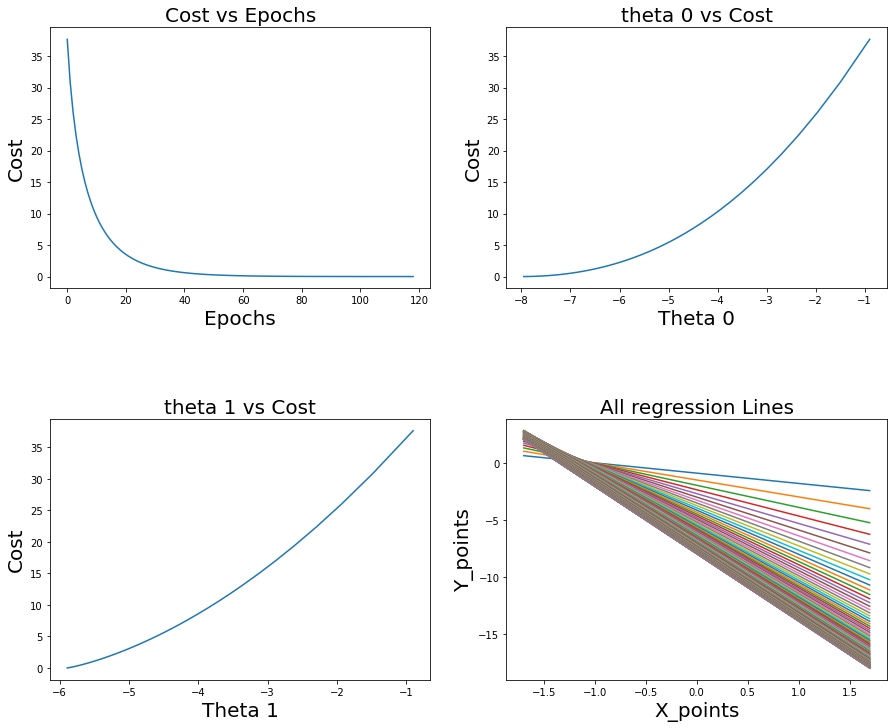

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

# Add Horizontal space between subplots
plt.subplots_adjust(hspace=0.5)

# plot Cost vs Epochs
ax[0,0].plot(cost)
ax[0,0].set_xlabel('Epochs', fontsize = 20)
ax[0,0].set_ylabel("Cost", fontsize = 20)
ax[0,0].set_title("Cost vs Epochs", fontsize = 20)


# theta 0 vs Cost
th_0 = [t[0,0] for t in thetas]
ax[0,1].plot(th_0, cost)
ax[0,1].set_xlabel('Theta 0', fontsize = 20)
ax[0,1].set_ylabel("Cost", fontsize = 20)
ax[0,1].set_title("theta 0 vs Cost", fontsize = 20)

# theta 1 vs Cost
th_1 = [t[0,1] for t in thetas]
ax[1,0].plot(th_1, cost)
ax[1,0].set_xlabel('Theta 1', fontsize = 20)
ax[1,0].set_ylabel("Cost", fontsize = 20)
ax[1,0].set_title("theta 1 vs Cost", fontsize = 20)


# All regression Lines
for i in range(iters):
#     f = th_0[i] + (th_1[i]*X[:,1])
    f = X@thetas[i].T
    
    ax[1,1].plot(X[:,1], f)
    ax[1,1].set_xlabel('X_points', fontsize = 20)
    ax[1,1].set_ylabel('Y_points', fontsize = 20)
    ax[1,1].set_title("All regression Lines", fontsize = 20)


plt.show()

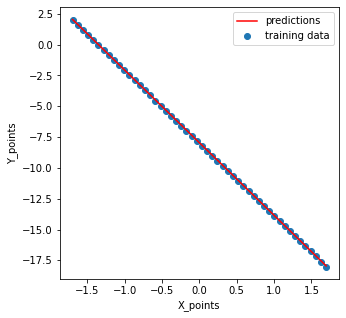

In [16]:
f = X @ theta
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X[:,1], f, 'r', label='predictions')
ax.scatter(X[:,1], y[:,0], label='training data')
ax.set_xlabel('X_points')
ax.set_ylabel('Y_points')
_ = ax.legend(loc=1)

In [11]:
iters

100

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

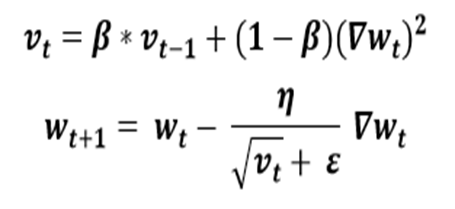

In [17]:
# if batch_size = m --> Batch GD
# if batch_size = 1 --> Stochastic GD
def RMS_grad(X, y, theta, alpha, beta, iters, batch_size, epsilon=10**-8, shuff=True):
#     cost = np.zeros(((iters*m)+1, 1))
    cost = [0]
#     thetas = np.zeros((iters*m, n))
    thetas = []
    H = []
    grads = [0]
    vt = 0
    
    for i in range(iters):
        mini_batches = create_mini_batches(X, y, batch_size, shuff)
        l = len(mini_batches)
        for idx, mini_batch in enumerate(mini_batches):
            
            x_mini, y_mini = mini_batch
            h = (x_mini @ theta)
            H.append(h)
            
            y_hat = h - y_mini
            
            grad = (x_mini.T @ y_hat) / m
            vt = (beta*vt) + ((1-beta) * (grad**2))
            
            grads.append(np.linalg.norm(grad))
        
            theta = theta - ((alpha * grad)/(np.sqrt(vt) + epsilon) )
            thetas.append(theta.T)

            cost.append(compute_cost(x_mini, y_mini, theta)[0,0])

            if np.abs(cost[(i*l)+idx+1] - cost[(i*l)+idx]) < 0.0001:
                iters = (i*l)+idx
                break

            if np.abs(grads[(i*l)+idx+1] - grads[(i*l)+idx]) < 0.0001:
                print(grads[(i*l)+idx+1] - grads[(i*l)+idx])
                iters = (i*l)+idx
                break
        else:
            continue  # only executed if the inner loop did NOT break
        break  # only executed if the inner loop DID break
        

        
    return theta, cost[1:], H, thetas, iters
    


In [19]:
alpha = 0.9
beta = 0.9
iters = 50*2
n = X.shape[1]
batch_size = m
theta = np.zeros((n,1))
# theta = np.random.randn(n,1)
theta, cost, H, thetas, iters = RMS_grad(X, y, theta, alpha, beta, iters, batch_size)
cost

[17.91487639912894,
 7.734736454372579,
 3.4940870022940005,
 1.5906560606296245,
 0.7149047106854859,
 0.31240757764459326,
 0.1311068786302056,
 0.05230369847766103,
 0.019664703970504235,
 0.006913746996771287,
 0.002255977120789716,
 0.0006778627455260182,
 0.00018595061440668636,
 4.611750911683011e-05,
 1.0224425260926861e-05]

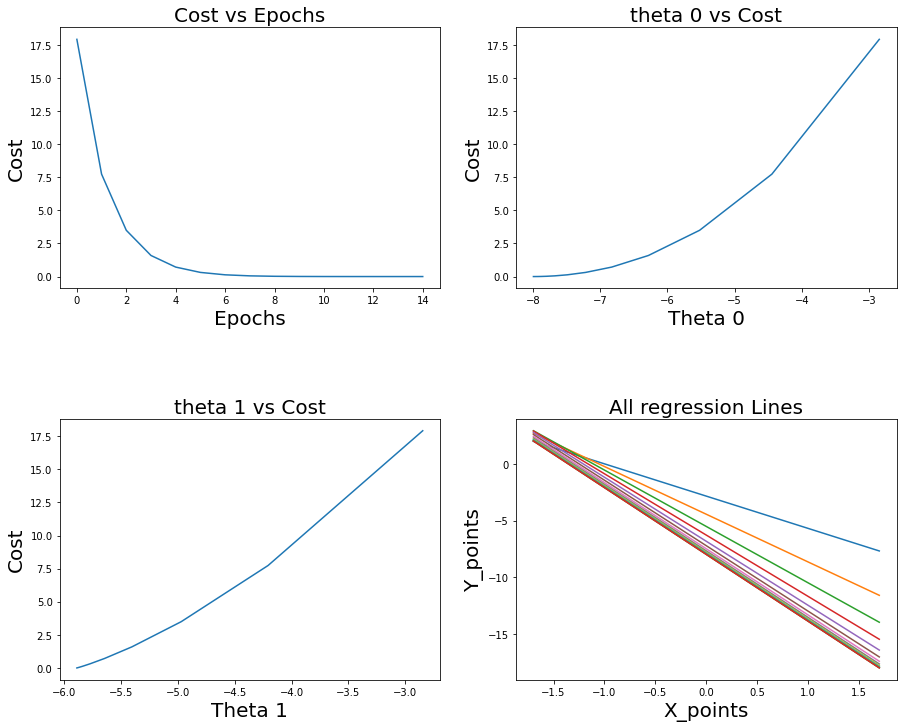

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

# Add Horizontal space between subplots
plt.subplots_adjust(hspace=0.5)

# plot Cost vs Epochs
ax[0,0].plot(cost)
ax[0,0].set_xlabel('Epochs', fontsize = 20)
ax[0,0].set_ylabel("Cost", fontsize = 20)
ax[0,0].set_title("Cost vs Epochs", fontsize = 20)


# theta 0 vs Cost
th_0 = [t[0,0] for t in thetas]
ax[0,1].plot(th_0, cost)
ax[0,1].set_xlabel('Theta 0', fontsize = 20)
ax[0,1].set_ylabel("Cost", fontsize = 20)
ax[0,1].set_title("theta 0 vs Cost", fontsize = 20)

# theta 1 vs Cost
th_1 = [t[0,1] for t in thetas]
ax[1,0].plot(th_1, cost)
ax[1,0].set_xlabel('Theta 1', fontsize = 20)
ax[1,0].set_ylabel("Cost", fontsize = 20)
ax[1,0].set_title("theta 1 vs Cost", fontsize = 20)


# All regression Lines
for i in range(iters):
#     f = th_0[i] + (th_1[i]*X[:,1])
    f = X@thetas[i].T
    
    ax[1,1].plot(X[:,1], f)
    ax[1,1].set_xlabel('X_points', fontsize = 20)
    ax[1,1].set_ylabel('Y_points', fontsize = 20)
    ax[1,1].set_title("All regression Lines", fontsize = 20)


plt.show()

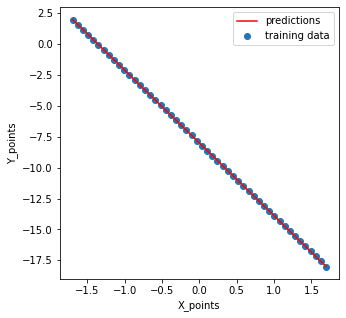

In [21]:
f = X @ theta
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X[:,1], f, 'r', label='predictions')
ax.scatter(X[:,1], y[:,0], label='training data')
ax.set_xlabel('X_points')
ax.set_ylabel('Y_points')
_ = ax.legend(loc=1)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

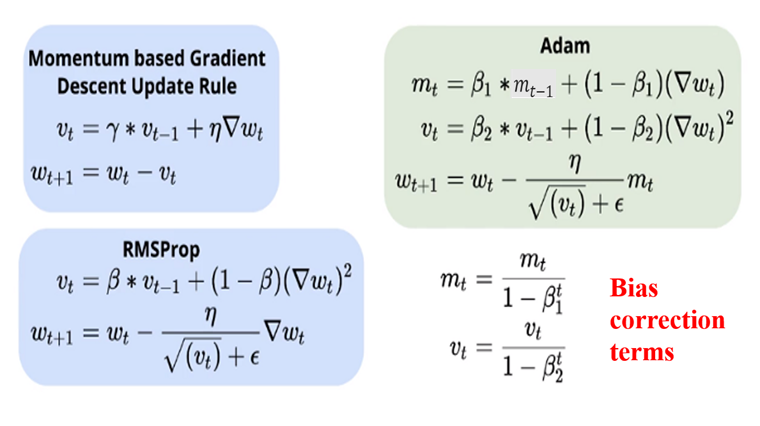

In [22]:
# if batch_size = m --> Batch GD
# if batch_size = 1 --> Stochastic GD
def Adam_grad(X, y, theta, alpha, beta1, beta2, iters, batch_size, epsilon=10**-8, shuff=True):
#     cost = np.zeros(((iters*m)+1, 1))
    cost = [0]
#     thetas = np.zeros((iters*m, n))
    thetas = []
    H = []
    grads = [0]
    mt = 0
    vt = 0
    
    for i in range(iters):
        mini_batches = create_mini_batches(X, y, batch_size, shuff)
        l = len(mini_batches)
        for idx, mini_batch in enumerate(mini_batches):
            
            x_mini, y_mini = mini_batch
            h = (x_mini @ theta)
            H.append(h)
            
            y_hat = h - y_mini
            
            grad = (x_mini.T @ y_hat) / m
            mt = (beta1*mt) + ((1-beta1) * grad)
            vt = (beta2*vt) + ((1-beta2) * (grad**2))
            
            mt_hat = mt/(1-beta1**(i+1))
            vt_hat = vt/(1-beta2**(i+1))
            
            grads.append(np.linalg.norm(grad))
        
            theta = theta - ((alpha * mt_hat)/(np.sqrt(vt_hat) + epsilon) )
            thetas.append(theta.T)

            cost.append(compute_cost(x_mini, y_mini, theta)[0,0])

            if np.abs(cost[(i*l)+idx+1] - cost[(i*l)+idx]) < 0.0001:
                iters = (i*l)+idx
                break

            if np.abs(grads[(i*l)+idx+1] - grads[(i*l)+idx]) < 0.0001:
                print(grads[(i*l)+idx+1] - grads[(i*l)+idx])
                iters = (i*l)+idx
                break
        else:
            continue  # only executed if the inner loop did NOT break
        break  # only executed if the inner loop DID break
        

        
    return theta, cost[1:], H, thetas, iters
    


In [23]:
alpha = 0.3
iters = 50*2
beta1 = 0.6
beta2 = 0.9
n = X.shape[1]
batch_size = m
theta = np.zeros((n,1))
# theta = np.random.randn(n,1)
theta, cost, H, thetas, iters = Adam_grad(X, y, theta, alpha, beta1, beta2, iters, batch_size)
cost

[45.26989351312306,
 41.390369896701806,
 37.71687407423591,
 34.25498697002989,
 31.00726109201481,
 27.97340168810734,
 25.150641132597467,
 22.534205172919716,
 20.117786877879997,
 17.893973258291915,
 15.854597911312284,
 13.991014194215778,
 12.294296121490609,
 10.755379980971465,
 9.365160957787877,
 8.11455791928263,
 6.994557378762633,
 5.996245337668983,
 5.110833580544264,
 4.329685173430238,
 3.644342364909447,
 3.0465587288483187,
 2.5283361392850883,
 2.081965985514826,
 1.700072928264555,
 1.3756585372142538,
 1.1021414623482186,
 0.8733905314418976,
 0.6837474698331042,
 0.52803686575959,
 0.4015624839187457,
 0.3000908366187346,
 0.21982470285393962,
 0.15737063759832298,
 0.1097050939528932,
 0.07414341410900824,
 0.04831468681391732,
 0.03014360264759069,
 0.01783840718620597,
 0.009882346495791451,
 0.005025031709543644,
 0.0022701471891578705,
 0.0008568705452306223,
 0.00023399685916456308,
 2.7620519672715077e-05,
 4.829355006654934e-06]

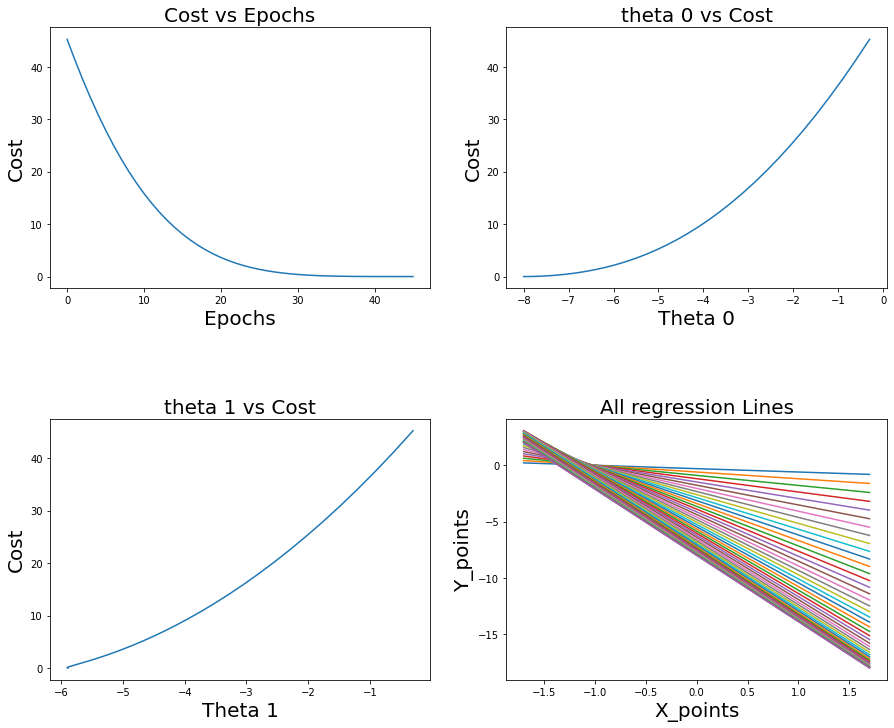

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,12))

# Add Horizontal space between subplots
plt.subplots_adjust(hspace=0.5)

# plot Cost vs Epochs
ax[0,0].plot(cost)
ax[0,0].set_xlabel('Epochs', fontsize = 20)
ax[0,0].set_ylabel("Cost", fontsize = 20)
ax[0,0].set_title("Cost vs Epochs", fontsize = 20)


# theta 0 vs Cost
th_0 = [t[0,0] for t in thetas]
ax[0,1].plot(th_0, cost)
ax[0,1].set_xlabel('Theta 0', fontsize = 20)
ax[0,1].set_ylabel("Cost", fontsize = 20)
ax[0,1].set_title("theta 0 vs Cost", fontsize = 20)

# theta 1 vs Cost
th_1 = [t[0,1] for t in thetas]
ax[1,0].plot(th_1, cost)
ax[1,0].set_xlabel('Theta 1', fontsize = 20)
ax[1,0].set_ylabel("Cost", fontsize = 20)
ax[1,0].set_title("theta 1 vs Cost", fontsize = 20)


# All regression Lines
for i in range(iters):
#     f = th_0[i] + (th_1[i]*X[:,1])
    f = X@thetas[i].T
    
    ax[1,1].plot(X[:,1], f)
    ax[1,1].set_xlabel('X_points', fontsize = 20)
    ax[1,1].set_ylabel('Y_points', fontsize = 20)
    ax[1,1].set_title("All regression Lines", fontsize = 20)


plt.show()

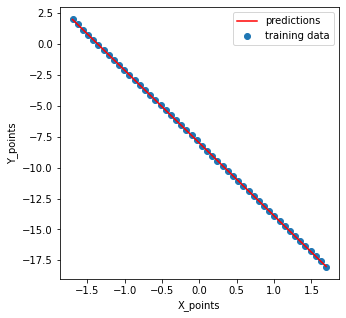

In [25]:
f = X @ theta
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X[:,1], f, 'r', label='predictions')
ax.scatter(X[:,1], y[:,0], label='training data')
ax.set_xlabel('X_points')
ax.set_ylabel('Y_points')
_ = ax.legend(loc=1)